In [66]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [67]:
pwd = os.getcwd()
path = pwd + '/asn1/data/ex1data2.txt'
data = pd.read_csv(path, header=None, names=['Size', 'Bedrooms', 'Price'])
data.head()

,Size,Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [68]:
data.describe()

,Size,Bedrooms,Price
count,47.000000,47.000000,47.000000
mean,2000.680851,3.170213,340412.659574
std,794.702354,0.760982,125039.899586
min,852.000000,1.000000,169900.000000
25%,1432.000000,3.000000,249900.000000
50%,1888.000000,3.000000,299900.000000
75%,2269.000000,4.000000,384450.000000
max,4478.000000,5.000000,699900.000000


In [69]:
# Data is extremely skewed (bedrooms in tens but price in hundreds thousands)
# apply feature normalization to normalize the data
data = (data - data.mean()) / data.std()
data.head()

,Size,Bedrooms,Price
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


In [70]:
# append a ones column to the front of the data
data.insert(0, 'Ones', 1)

In [71]:
# set X (training data) and y (target variable)
cols = data.shape[1]

# locate every row, and every column but the last
X = data.iloc[:, :cols - 1]

# locate every row, and the last column
y = data.iloc[:, cols-1:]

In [72]:
# convert from data frames to numpy matrices
X = np.matrix(X.values)
y = np.matrix(y.values)

# set theta to accommodate any size of X's features
theta = np.matrix(np.zeros(cols - 1))

In [73]:
X.shape, y.shape, theta.shape

((47, 3), (47, 1), (1, 3))

# Cost Function

$$ J(\theta) = \frac{1}{2m} \sum_{i=1}^{m} (h_{\theta}(x^{(i)}) - y^{(i)})^2$$

Where the hypothesis function is

$$ h_{\theta} = \theta^{T}x = \theta_0 + \theta_1x_1$$

In [74]:
# cost function
m = len(X)
h = X * theta.T

# Constants must floats to maintain fractions in division
cost = (1.0 / (2 * m)) * np.sum(np.power(h - y, 2))

cost

0.48936170212765978

# Gradient Descent

$$ \theta_{j} := \theta_{j}  - \alpha \frac{1}{m} \sum_{i=1}^{m} (h_{\theta}(x^{(i)}) - y^{(i)})x^{(i)} $$ (simultaneously update $\theta_j$ for all j)

In [75]:
# predefine alpha and num of iterations. This is found in your original source code for best values
alpha = 0.01
iters = 1000

m = len(X)
temp_theta = np.matrix(np.zeros(theta.shape))

# Unroll your theta parameters to a one-dimensional array. Not necessary
# for this example, but standard practice for when theta becomes
# multidimensional (think CNNs, where it's a matrix instead of a vector)
num_parameters = theta.flatten().shape[1]
cost = np.zeros(iters)

for i in range(iters):
    h = X * theta.T

    temp_theta = theta - (alpha * (1.0 / m)) * sum(np.multiply(h - y, X))

    theta = temp_theta
    cost[i] = (1.0 / (2 * m)) * np.sum(np.power(h - y, 2))

print "Theta:", theta[0, 0], theta[0, 1]
print "Cost:", cost[-1]

Theta: -1.02672008011e-16 0.878503652223
Cost: 0.130703516025


In [76]:
cost_history = pd.DataFrame(cost, columns=['Cost'])
cost_history['Iterations'] = cost_history.index
cost_history.head(10)

,Cost,Iterations
0,0.489362,0
1,0.480549,1
2,0.471986,2
3,0.463665,3
4,0.455578,4
5,0.447719,5
6,0.440082,6
7,0.432659,7
8,0.425444,8
9,0.418431,9


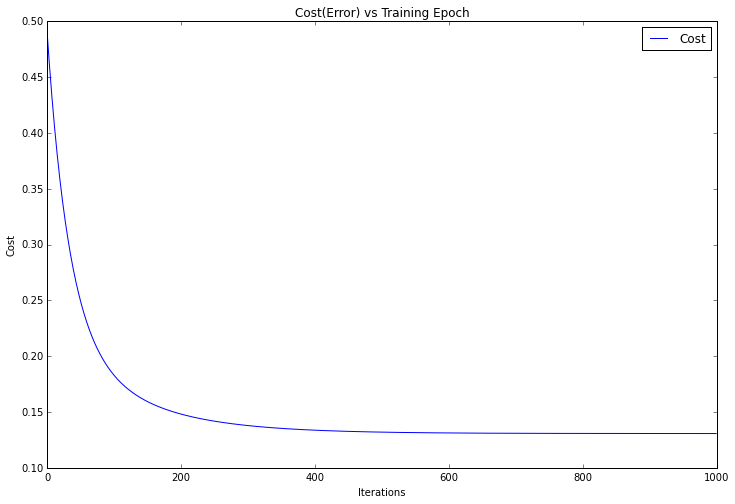

In [77]:
pplt = cost_history.plot(kind='line', x='Iterations', y='Cost', title='Cost(Error) vs Training Epoch', figsize=(12, 8), ylim=(0.1, 0.5), xlim=(0, 1000))
pplt.set_ylabel('Cost')